# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

**(Number of Rows , Number of Columns)**

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# **Finding Unique Values**

In [5]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
for i in columns:
    print(i+" "+ str(df[i].unique))

longitude <bound method Series.unique of 0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64>
latitude <bound method Series.unique of 0        37.88
1        37.86
2        37.85
3        37.85
4        37.85
         ...  
20635    39.48
20636    39.49
20637    39.43
20638    39.43
20639    39.37
Name: latitude, Length: 20640, dtype: float64>
housing_median_age <bound method Series.unique of 0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20640, dtype: float64>
total_rooms <bound method Series.unique of 0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Nam

# **Checking for Null values**

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Treating Null Values :**

Dropping **207 null values** from the California housing dataset, which contains over **20,000 rows**, is a reasonable approach to handle missing data, as it represents less than 1% of the total dataset. This small proportion of missing values is **unlikely** to significantly impact the overall distribution or analysis of the data. By removing these rows, we ensure that the remaining dataset is clean and **free of inconsistencies**, which helps improve the reliability and accuracy of the models used. 

Furthermore, this approach **avoids the potential biases or inaccuracies** that could arise from imputing missing values, especially if the missingness does not follow a specific pattern or if the dataset is large enough to maintain its integrity without these rows. Hence, **dropping 207 null values is a pragmatic decision that balances data quality with the need for sufficient data for analysis.**

In [7]:
df1 = df.dropna()
df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# **Visualizing Data for Better Understanding**

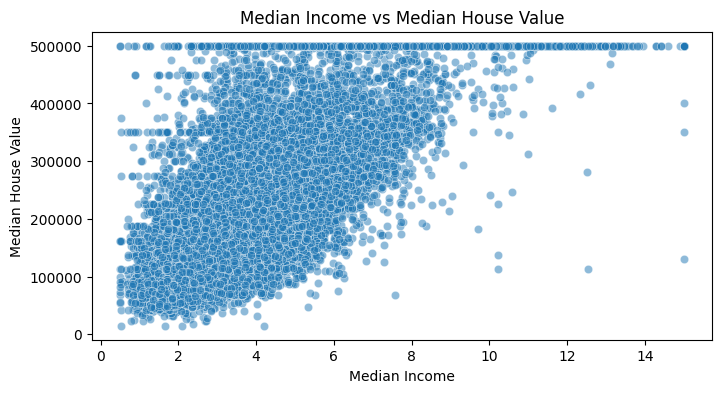

In [9]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df1,x="median_income",y="median_house_value",alpha=0.5)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()

Analyzing **Median Income vs. Median House Value** is critical for understanding the interplay between income levels and housing prices, making it a valuable step in both **exploratory data analysis (EDA) and predictive modeling.**

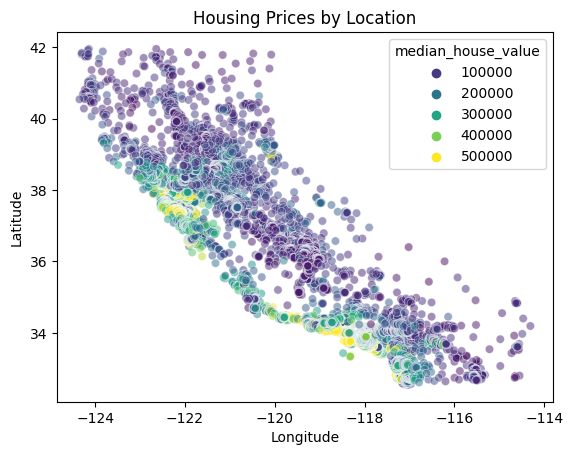

In [10]:
sns.scatterplot(data=df1,x="longitude",y="latitude",hue="median_house_value",palette="viridis",alpha=0.5)
plt.title("Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Analyzing **housing prices by location** provides invaluable insights into the spatial distribution of housing costs and their drivers. This analysis is crucial for understanding market dynamics, supporting predictive modeling, and guiding policy decisions to address housing needs effectively.

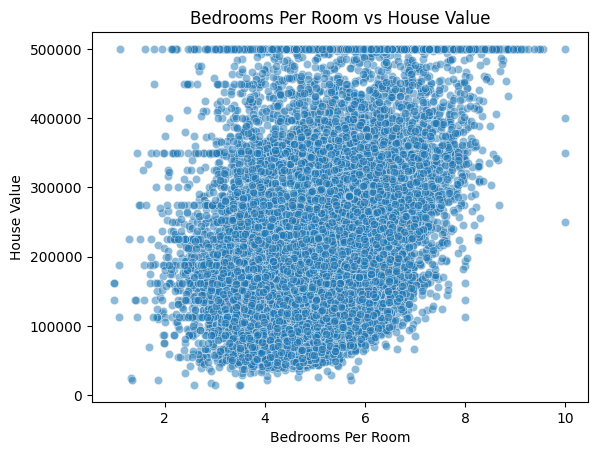

In [11]:
df1["bedrooms_per_room"] = df1["total_rooms"]/ df1["total_bedrooms"] 
sns.scatterplot(data=df1,x="bedrooms_per_room",y="median_house_value",alpha=0.5)
plt.title("Bedrooms Per Room vs House Value")
plt.xlabel("Bedrooms Per Room")
plt.ylabel("House Value")
plt.show()

The purpose of analyzing the relationship between **Bedrooms Per Room and House Value** in a dataset like the California housing dataset is to understand how the proportion of bedrooms relative to total rooms in a property impacts its market value. This analysis provides valuable insights into housing characteristics and helps in feature engineering and decision-making.

In [12]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714


**Dropping Columns with Categorical Values to draw Correlation Matrix :**

In [13]:
df2 = df1.drop(["ocean_proximity"],axis="columns")

# **Correlation Matrix**

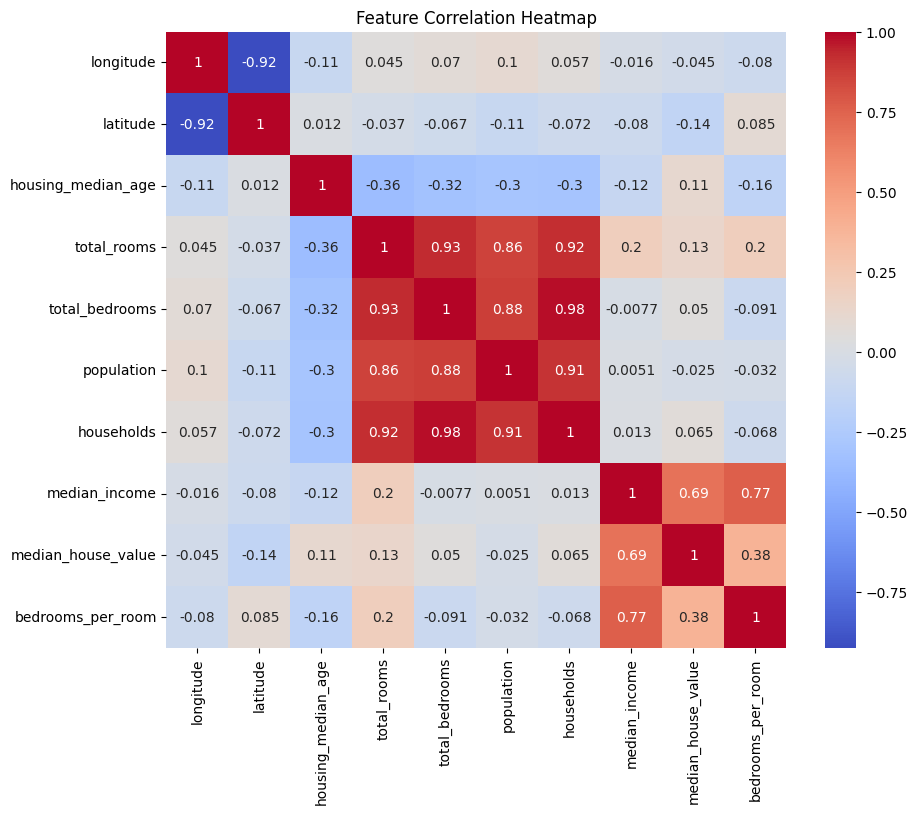

In [14]:
correlation_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

**Dealing with Categorical Values :**

In [15]:
dummy_values= pd.get_dummies(df1.ocean_proximity).astype(int)
dummy_values.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [16]:
df2 = pd.concat([df1,dummy_values.drop("NEAR OCEAN",axis=1)],axis=1)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714,0,0,0,1


In [17]:
df3 = df2.drop("ocean_proximity",axis=1)
df3.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.821705,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.418626,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,7.721053,0,0,0,1


In [18]:
df3.shape

(20433, 14)

In [19]:
X = df3.drop("median_house_value",axis=1)
y = df3["median_house_value"]

**Splitting Data For training and testing :**

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.8,random_state=10)

**Linear Regression :**

In [21]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.643009345226559

**Ridge Regression (L2 Regularization) :**

In [22]:
from sklearn.linear_model import Ridge
r_model = Ridge(alpha=1.0)  
r_model.fit(X_train, y_train)
r_model.score(X_test,y_test)


0.6430084991258223

**Lasso Regression (L1 Regularization) :**

In [23]:
from sklearn.linear_model import Lasso
l_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
l_model.fit(X_train, y_train)
l_model.score(X_test,y_test)


0.6430093061631099

**Decision Tree Regression :**

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=5)  # Control depth to avoid overfitting
dt_model.fit(X_train, y_train)
dt_model.score(X_test,y_test)


0.6250841380236926

**Random Forest Regression :**

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test,y_test)



0.827841989927216

# **Determining the suitable model**

In [27]:
models = {
    'Linear Regression': l_model,
    'Ridge Regression': r_model,
    'Lasso Regression': lr_model,
    'DecisionTree Regressor' : dt_model,
    'Random Forest': rf_model
}
results={}
from sklearn.metrics import mean_squared_error, r2_score
for name,model in models.items():
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_score = model.score(X_test,y_test)
    results[name] = {'RMSE': rmse, 'R²': r2, 'Model Score' : model_score}

results_df = pd.DataFrame(results).T
results_df

,RMSE,R²,Model Score
Linear Regression,4.696379e+09,0.643009,0.643009
Ridge Regression,4.696390e+09,0.643008,0.643008
Lasso Regression,4.696379e+09,0.643009,0.643009
DecisionTree Regressor,4.932193e+09,0.625084,0.625084
Random Forest,2.264819e+09,0.827842,0.827842


# **Conclusion**

In conclusion, the **Random Forest** regression technique proves to be the most suitable for predicting **California housing prices** in this analysis. It consistently outperforms other models, delivering a **high R² score and a low RMSE**, indicating its strong predictive power and ability to capture complex relationships within the dataset.
The Random Forest algorithm, being an **ensemble method**, benefits from its ability to handle non-linearities and interactions between multiple features, which is crucial for the California housing dataset, where factors such as location, proximity to the ocean, and other regional characteristics play a significant role in determining housing prices. Moreover, its robustness to overfitting and ability to handle large datasets with numerous features make it an ideal choice for this type of problem. **Overall, Random Forest provides a highly accurate, reliable, and interpretable solution for the California housing price prediction task.**